In [1]:
#install kaggle
!pip install -q kaggle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
#create a kaggle folder
! mkdir ~/.kaggle2/

In [ ]:
#copy the kaggle.json to folder created
! cp /content/drive/MyDrive/kaggle.json ~/.kaggle2/

In [ ]:
#permission for the json act
! chmod 600 ~/.kaggle2/kaggle.json

In [ ]:
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

Dataset URL: https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
toronto-emotional-speech-set-tess.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip toronto-emotional-speech-set-tess.zip

Streaming output truncated to the last 5000 lines.
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_back_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bar_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_base_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bath_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bean_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_beg_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bite_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_boat_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bone_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_book_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bought_angry.wav  
  inflating: TESS Toronto emotional 

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [ ]:
!mkdir input

In [ ]:
!mv /content/tess toronto emotional speech set data ~/.kaggle/

mv: target '/root/.kaggle/' is not a directory


In [ ]:
input='/content/TESS Toronto emotional speech set data'

IMPORT MODULES

In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')
from keras import utils

Load the Dataset

In [ ]:
paths =[]
labels = []

for dirname, _, filenames in os.walk('/content/tess toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is loaded')

Dataset is loaded


In [ ]:
len(paths)

2800

In [ ]:
paths[:5]

['/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_disgust/YAF_numb_disgust.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_disgust/YAF_bite_disgust.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_disgust/YAF_thought_disgust.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_disgust/YAF_reach_disgust.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_disgust/YAF_calm_disgust.wav']

In [ ]:
labels[:5]

['disgust', 'disgust', 'disgust', 'disgust', 'disgust']

In [ ]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/content/tess toronto emotional speech set dat...,disgust
1,/content/tess toronto emotional speech set dat...,disgust
2,/content/tess toronto emotional speech set dat...,disgust
3,/content/tess toronto emotional speech set dat...,disgust
4,/content/tess toronto emotional speech set dat...,disgust


In [ ]:
df['label'].value_counts()

,count
label,
disgust,400
angry,400
neutral,400
ps,400
fear,400
sad,400
happy,400


In [ ]:
df['label_count']= df['label'].value_counts()

In [ ]:
df.drop('label_count', axis = 1)

,speech,label
0,/content/tess toronto emotional speech set dat...,disgust
1,/content/tess toronto emotional speech set dat...,disgust
2,/content/tess toronto emotional speech set dat...,disgust
3,/content/tess toronto emotional speech set dat...,disgust
4,/content/tess toronto emotional speech set dat...,disgust
...,...,...
2795,/content/tess toronto emotional speech set dat...,sad
2796,/content/tess toronto emotional speech set dat...,sad
2797,/content/tess toronto emotional speech set dat...,sad
2798,/content/tess toronto emotional speech set dat...,sad


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   speech       2800 non-null   object 
 1   label        2800 non-null   object 
 2   label_count  0 non-null      float64
dtypes: float64(1), object(2)
memory usage: 65.8+ KB


<Axes: xlabel='label', ylabel='count'>

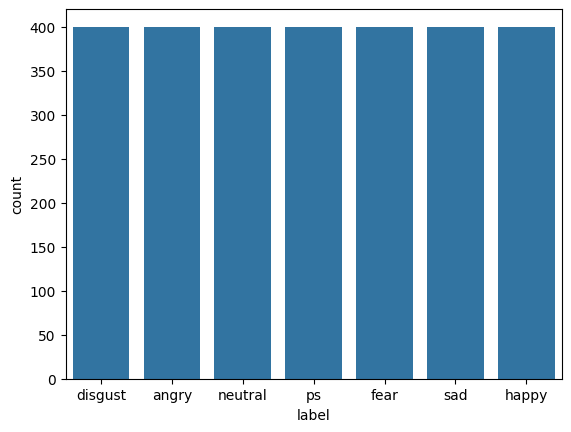

In [ ]:
sns.countplot(data=df, x='label')

## Exploratory Data Analysis

In [ ]:
df

,speech,label,label_count
0,/content/tess toronto emotional speech set dat...,disgust,NaN
1,/content/tess toronto emotional speech set dat...,disgust,NaN
2,/content/tess toronto emotional speech set dat...,disgust,NaN
3,/content/tess toronto emotional speech set dat...,disgust,NaN
4,/content/tess toronto emotional speech set dat...,disgust,NaN
...,...,...,...
2795,/content/tess toronto emotional speech set dat...,sad,NaN
2796,/content/tess toronto emotional speech set dat...,sad,NaN
2797,/content/tess toronto emotional speech set dat...,sad,NaN
2798,/content/tess toronto emotional speech set dat...,sad,NaN


In [ ]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   speech       2800 non-null   object 
 1   label        2800 non-null   object 
 2   label_count  0 non-null      float64
dtypes: float64(1), object(2)
memory usage: 65.8+ KB


In [ ]:
df.drop('label_count', axis=1, inplace = True)

In [ ]:
print(df.head())
print(df['label'].unique())

                                              speech    label
0  /content/tess toronto emotional speech set dat...  disgust
1  /content/tess toronto emotional speech set dat...  disgust
2  /content/tess toronto emotional speech set dat...  disgust
3  /content/tess toronto emotional speech set dat...  disgust
4  /content/tess toronto emotional speech set dat...  disgust
['disgust' 'angry' 'neutral' 'ps' 'fear' 'sad' 'happy']


In [ ]:
df['speech'].unique()

array(['/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_disgust/YAF_numb_disgust.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_disgust/YAF_bite_disgust.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_disgust/YAF_thought_disgust.wav',
       ...,
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Sad/OAF_chain_sad.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Sad/OAF_lid_sad.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Sad/OAF_food_sad.wav'],
      dtype=object)

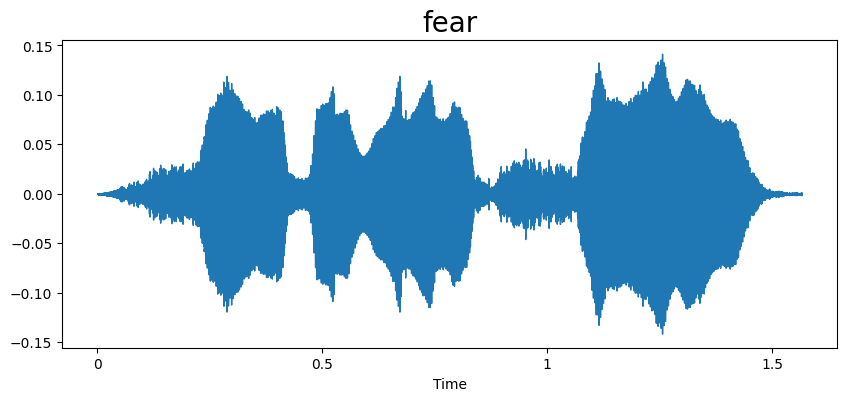

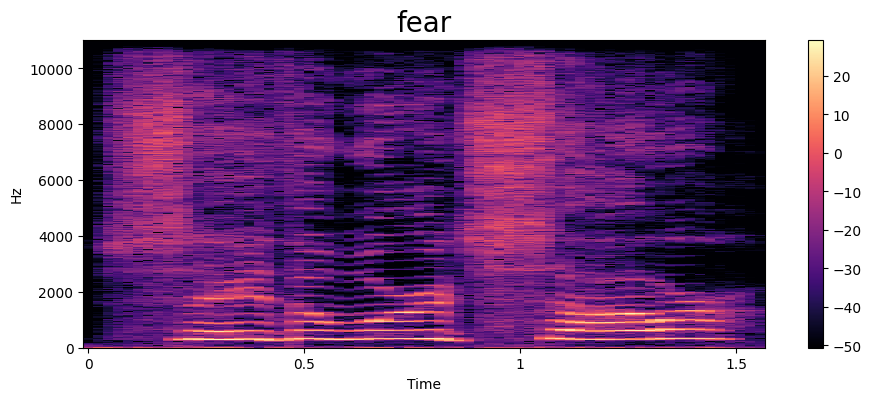

In [ ]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

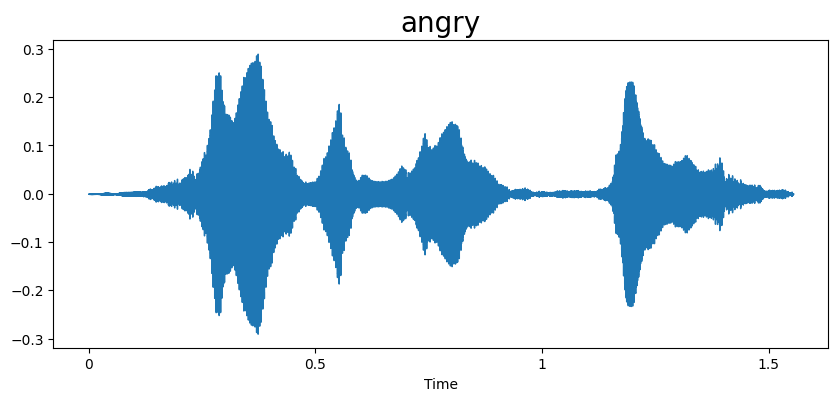

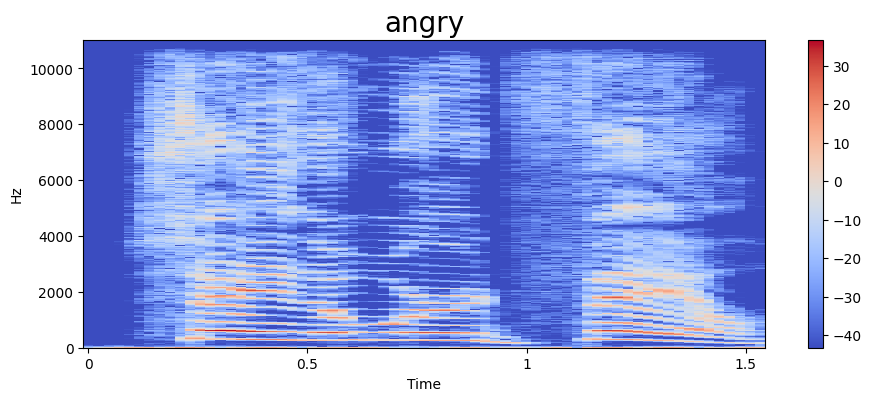

In [ ]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

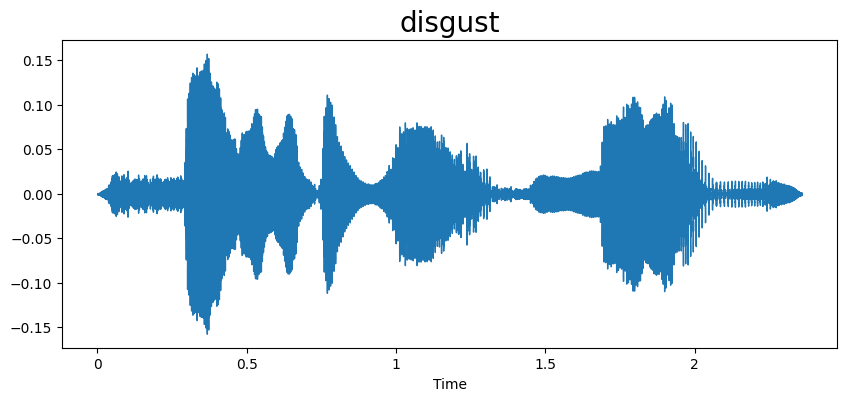

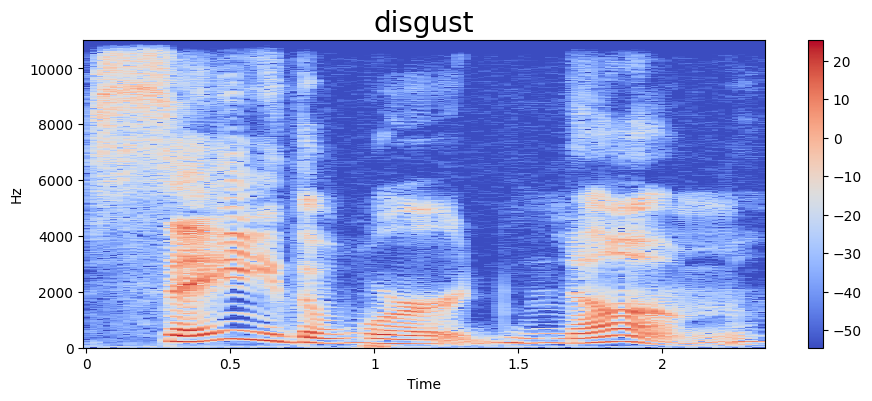

In [ ]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

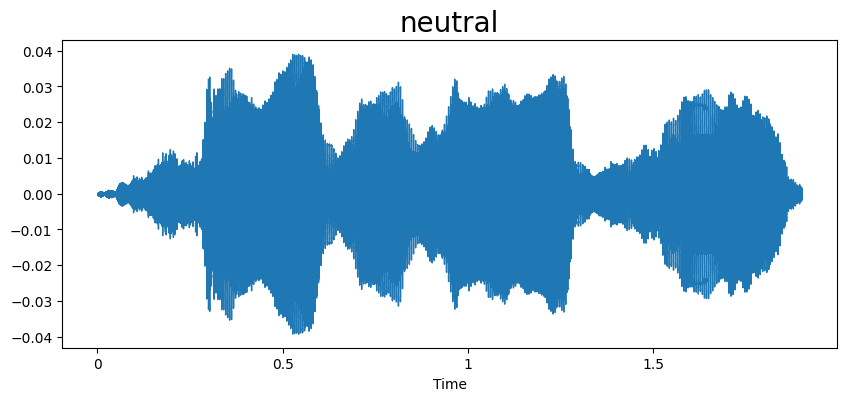

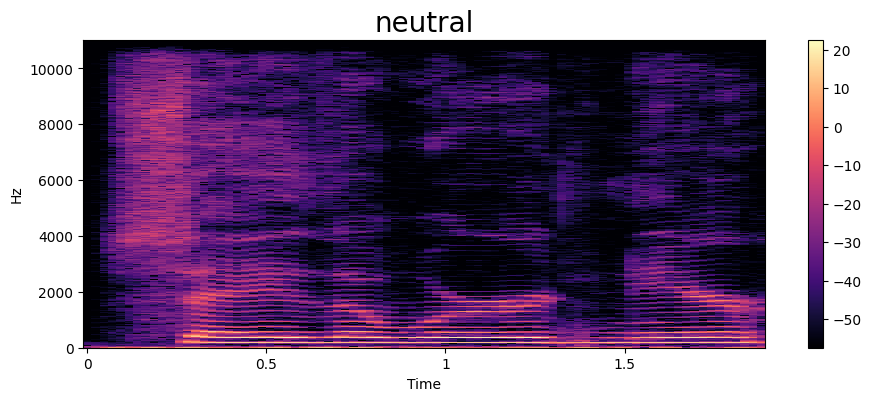

In [ ]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

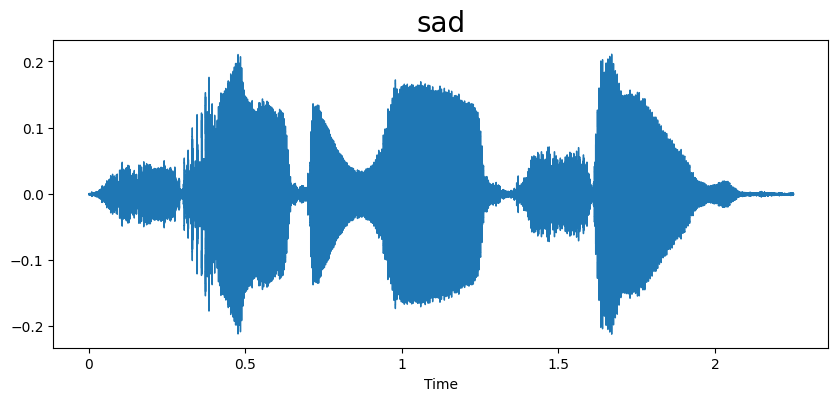

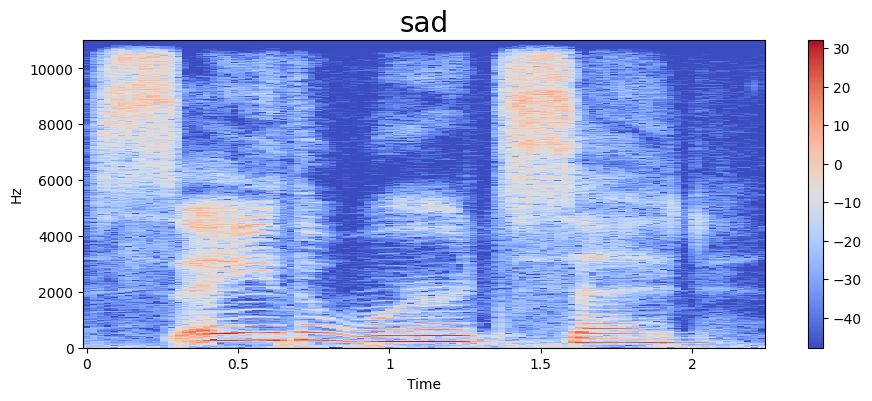

In [ ]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

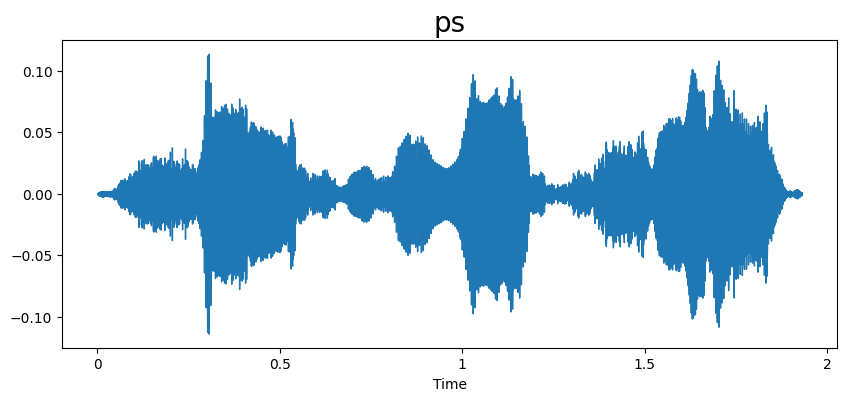

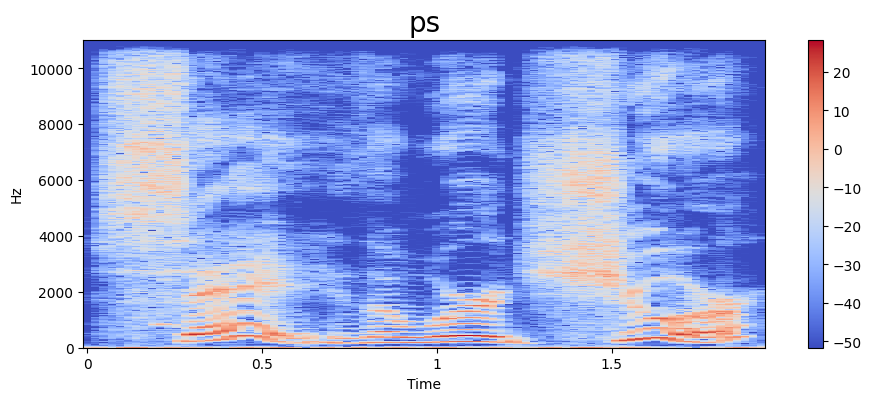

In [ ]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

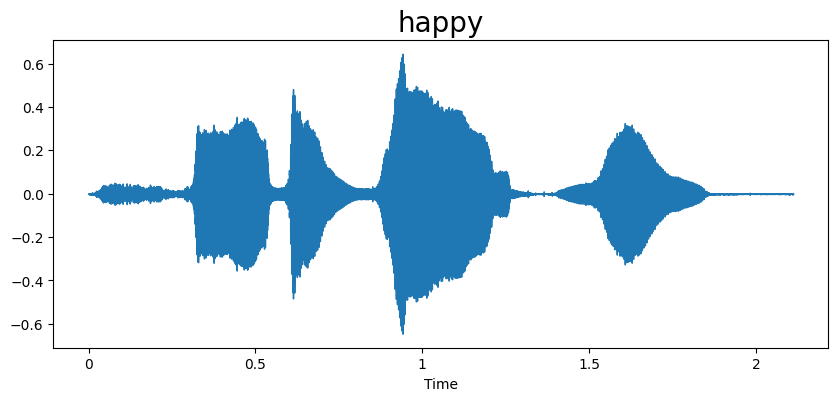

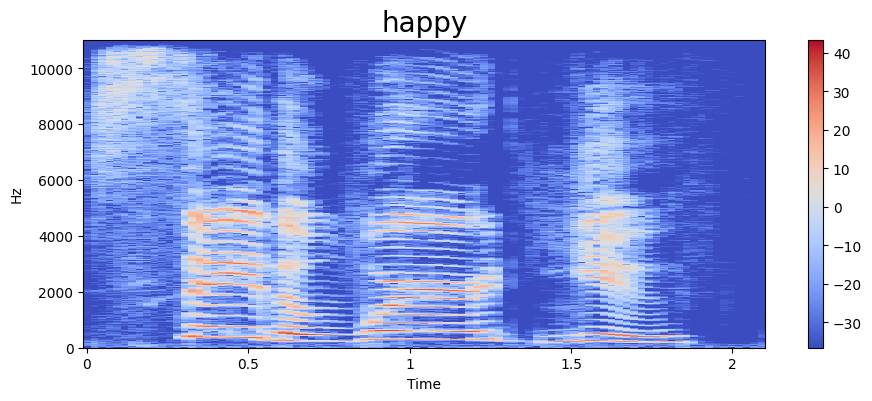

In [ ]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

Feature Extraction

In [ ]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [ ]:
extract_mfcc(df['speech'][0])

array([-4.2433801e+02,  1.2623822e+02, -9.9965453e-01,  1.8667027e+01,
       -1.2271390e+01,  1.3606673e+01, -5.2014260e+00, -3.0495050e+01,
       -7.2994361e+00, -6.4989691e+00, -8.5200062e+00,  2.0170049e-01,
       -9.8352318e+00,  4.2109995e+00, -1.5250511e+01, -8.3910480e-02,
       -2.0452824e+00, -5.6341510e+00, -4.1440940e-01, -1.0695918e+01,
       -2.7749062e+00, -2.2668219e+00, -1.1448975e+01,  5.6208916e+00,
       -7.6643949e+00,  6.2004089e-01, -4.6389279e+00, -2.4452701e+00,
        5.8025652e-01,  5.0416440e-01, -3.0739589e+00,  2.9664462e+00,
       -2.2582743e+00,  1.7407013e+00, -3.6002317e-01,  9.2435980e-01,
        1.0507718e+00,  3.3962369e+00,  2.2799032e+00,  7.9653687e+00],
      dtype=float32)

In [ ]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [ ]:
X_mfcc

,speech
0,"[-424.338, 126.23822, -0.99965453, 18.667027, ..."
1,"[-412.17133, 80.672745, -3.158254, 23.655542, ..."
2,"[-416.84616, 88.25327, -8.606145, 24.975777, -..."
3,"[-417.61884, 72.79898, -3.468855, 33.99773, -1..."
4,"[-385.07043, 114.565315, -16.425419, 12.502725..."
...,...
2795,"[-516.85876, 99.76607, 21.719501, 6.541364, 21..."
2796,"[-568.92444, 89.54974, 28.401985, 21.516354, 2..."
2797,"[-536.6411, 93.577324, 27.457087, 25.147121, 2..."
2798,"[-553.8178, 92.43754, 34.934864, 16.751532, 27..."


In [ ]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [ ]:
## input split
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [ ]:
y = y.toarray()

In [ ]:
y.shape

(2800, 7)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

Create the LSTM Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40, 1)),
    Dropout(0.5),  # Add dropout after LSTM layer
    Dense(128, activation='relu'),
    Dropout(0.5),  # Add dropout after dense layer
    Dense(64, activation='relu'),
    Dropout(0.5),  # Add dropout after dense layer
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
Model: "sequential"

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 4

In [ ]:
#Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=64)

Epoch 1/30
35/35 [==============================] - 7s 28ms/step - loss: 1.6827 - accuracy: 0.3179 - val_loss: 1.0208 - val_accuracy: 0.5518
Epoch 2/30
35/35 [==============================] - 0s 9ms/step - loss: 1.0718 - accuracy: 0.5500 - val_loss: 0.6310 - val_accuracy: 0.8161
Epoch 3/30
35/35 [==============================] - 0s 7ms/step - loss: 0.7182 - accuracy: 0.7143 - val_loss: 0.2892 - val_accuracy: 0.9125
Epoch 4/30
35/35 [==============================] - 0s 8ms/step - loss: 0.5254 - accuracy: 0.8366 - val_loss: 0.2030 - val_accuracy: 0.9339
Epoch 5/30
35/35 [==============================] - 0s 6ms/step - loss: 0.4537 - accuracy: 0.8491 - val_loss: 0.2072 - val_accuracy: 0.9429
Epoch 6/30
35/35 [==============================] - 0s 7ms/step - loss: 0.3680 - accuracy: 0.8817 - val_loss: 0.1439 - val_accuracy: 0.9554
Epoch 7/30
35/35 [==============================] - 0s 7ms/step - loss: 0.2918 - accuracy: 0.9201 - val_loss: 0.1320 - val_accuracy: 0.9607
Epoch 8/30
35/35 [=

In [ ]:
# best val accuracy: 0.98
# use checkpoint to save the best val accuracy model
# adjust learning rate for slow convergence

## Plot the results

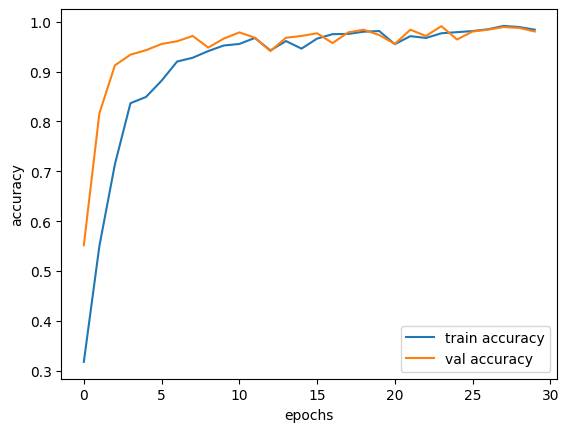

In [ ]:
epochs = list(range(30))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

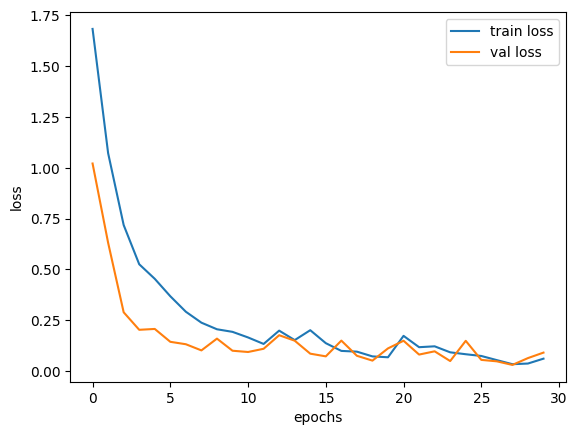

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_val_classes = np.argmax(y_val, axis=1)

18/18 [==============================] - 0s 5ms/step


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_val_classes, y_pred_classes)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[79  0  1  0  0  2  0]
 [ 0 89  0  0  0  0  0]
 [ 0  1 84  0  0  0  0]
 [ 0  0  0 73  0  3  0]
 [ 0  0  0  0 77  0  0]
 [ 0  1  0  1  0 75  0]
 [ 0  2  0  0  0  0 72]]


In [ ]:
#Print the classification report
target_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'ps', 'sad']
print("Classification Report:")
print(classification_report(y_val_classes, y_pred_classes, target_names=target_names))

Classification Report:
              precision    recall  f1-score   support

       angry       1.00      0.96      0.98        82
     disgust       0.96      1.00      0.98        89
        fear       0.99      0.99      0.99        85
       happy       0.99      0.96      0.97        76
     neutral       1.00      1.00      1.00        77
          ps       0.94      0.97      0.96        77
         sad       1.00      0.97      0.99        74

    accuracy                           0.98       560
   macro avg       0.98      0.98      0.98       560
weighted avg       0.98      0.98      0.98       560



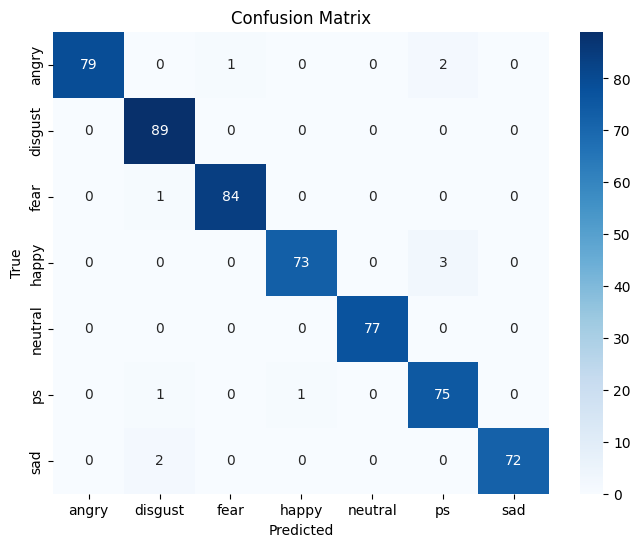

In [ ]:
#Correlation HeatMap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()